Vector embeddings (Word2Vec)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Vocabulary:
['sri', 'lanka', 'country', 'diverse', 'heritage', 'world', 'tea', 'cricket', 'known', 'city', 'india', 'capital', 'anuradhapura', 'unesco', 'located', 'nation', 'site', 'rich', 'buddhist', 'yala', 'national', 'park', 'home', 'island', 'range', 'wildlife', 'including', 'ancient', 'plantations', 'region', 'history', 'colombo', 'south', 'vibrant', 'culture', 'ocean', 'colonial', 'famous', 'key', 'indian', 'production', 'hill', 'elephants', 'nuwara', 'eliya', 'leopards', 'society', 'multicultural', 'cuisine', 'fortified', 'dutch', 'historic', 'landmark', 'southern', 'team', 'achieved', 'global', 'recognition', 'winning', 'cup', 'celebrates', 'festivals', 'sinhala', 'tamil', 'new', 'year', 'vesak', 'reflecting', 'later', 'portuguese', 'built', 'popular', 'renowned', 'use', 'spices', 'dishes', 'like', 'rice', 'curry', 'hoppers', 'sinharaja', 'fort', 'forest', 'reserve', 'tropical', 'rainforest', 'endemic', 'flora', 'fauna', 'galle', 'lankan']

Word Vector for 'country':
[ 1.0275

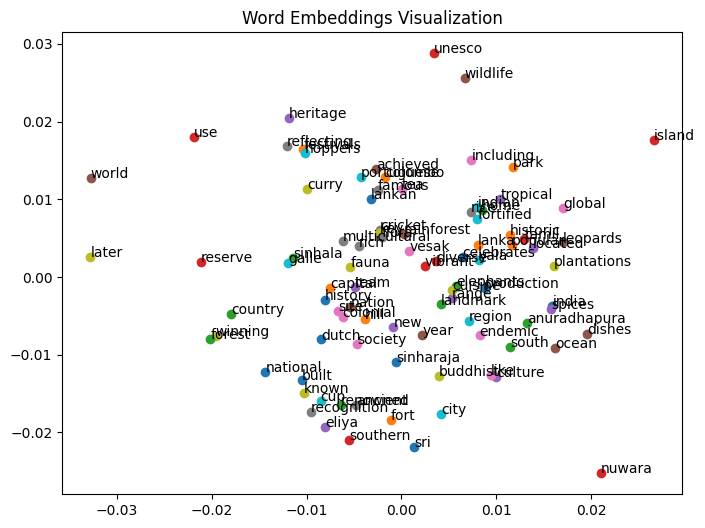

In [1]:
!pip install gensim
# Import necessary libraries for word embeddings, text preprocessing, and visualization
from gensim.models import Word2Vec  # Library for training Word2Vec models
from gensim.utils import simple_preprocess  # Utility for tokenizing and basic preprocessing
import nltk  # Natural Language Toolkit for text processing
from nltk.corpus import stopwords  # Stopwords for filtering common words

# Ensure required NLTK data (stopwords) is downloaded
nltk.download('stopwords')  # Download stopwords dataset if not already present

# Define a small sample text dataset about Sri Lanka
dataset = [
    "Sri Lanka is an island nation located in the Indian Ocean, south of India.",
    "The country's capital is Colombo, known for its vibrant culture and colonial history.",
    "Sri Lanka is famous for its tea production, with the hill city of Nuwara Eliya being a key region for tea plantations.",
    "The ancient city of Anuradhapura is a UNESCO World Heritage Site with rich Buddhist heritage.",
    "The Yala National Park in Sri Lanka is home to a diverse range of wildlife, including leopards and elephants.",
    "Sri Lankan cuisine is renowned for its use of spices, with dishes like rice and curry and hoppers being popular.",
    "The Sinharaja Forest Reserve is a tropical rainforest in Sri Lanka, known for its endemic flora and fauna.",
    "Galle Fort, built by the Portuguese and later fortified by the Dutch, is a historic landmark in southern Sri Lanka",
    "Sri Lanka's cricket team has achieved global recognition, winning the Cricket World Cup in 1996.",
    "The country celebrates diverse festivals such as Sinhala and Tamil New Year and Vesak, reflecting its multicultural society."
]

# Define a function to preprocess the text corpus
def preprocess_text(corpus):
    stop_words = set(stopwords.words('english'))  # Load English stopwords into a set for faster lookup
    preprocessed_corpus = []  # Initialize empty list to store preprocessed sentences
    for sentence in corpus:  # Iterate through each sentence in the corpus
        # Tokenize sentence, convert to lowercase, and remove punctuation
        tokens = simple_preprocess(sentence, deacc=True)  # deacc=True removes punctuation
        # Filter out stopwords from the tokenized sentence
        tokens = [word for word in tokens if word not in stop_words]
        preprocessed_corpus.append(tokens)  # Append tokenized sentence to the preprocessed corpus
    return preprocessed_corpus  # Return the list of preprocessed sentences

# Preprocess the dataset using the defined function
processed_corpus = preprocess_text(dataset)  # Get tokenized and cleaned sentences

# Train a Word2Vec model on the preprocessed corpus
model = Word2Vec(
    sentences=processed_corpus,  # Input tokenized sentences
    vector_size=100,  # Set dimensionality of word vectors (100-dimensional embeddings)
    window=3,         # Set context window size (3 words before and after the target word)
    min_count=1,      # Include words appearing at least once in the vocabulary
    workers=4,        # Use 4 CPU threads for faster training
    sg=1              # Use skip-gram model (1 for skip-gram, 0 for CBOW)
)

# Save the trained Word2Vec model to a file
model.save("word2vec_demo.model")  # Save model for future use

# Display the vocabulary (list of words learned by the model)
print("Vocabulary:")
print(list(model.wv.index_to_key))  # Print all words in the model's vocabulary

# Test the model by retrieving the word vector for 'country'
print("\nWord Vector for 'country':")
print(model.wv['country'])  # Access and print the 100-dimensional vector for 'country'

# Find and display words most similar to 'country' based on cosine similarity
print("\nMost Similar Words to 'country':")
print(model.wv.most_similar('country'))  # Print top similar words and their similarity scores

# Optional: Visualize word vectors using PCA for dimensionality reduction
from sklearn.decomposition import PCA  # Import PCA for reducing vector dimensions
import matplotlib.pyplot as plt  # Import plotting library for visualization

# Extract word vectors and their corresponding words
words = list(model.wv.index_to_key)  # Get all words in the vocabulary
vectors = [model.wv[word] for word in words]  # Get the vector for each word

# Reduce 100-dimensional vectors to 2D for visualization
pca = PCA(n_components=2)  # Initialize PCA to reduce to 2 dimensions
reduced_vectors = pca.fit_transform(vectors)  # Apply PCA transformation to word vectors

# Create a scatter plot to visualize word embeddings
plt.figure(figsize=(8, 6))  # Set figure size for the plot
for i, word in enumerate(words):  # Iterate through words and their 2D coordinates
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])  # Plot each word as a point
    plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]))  # Label each point with the word
plt.title("Word Embeddings Visualization")  # Set plot title
plt.show()  # Display the plot


## Self-Attention Mechanism – Example  

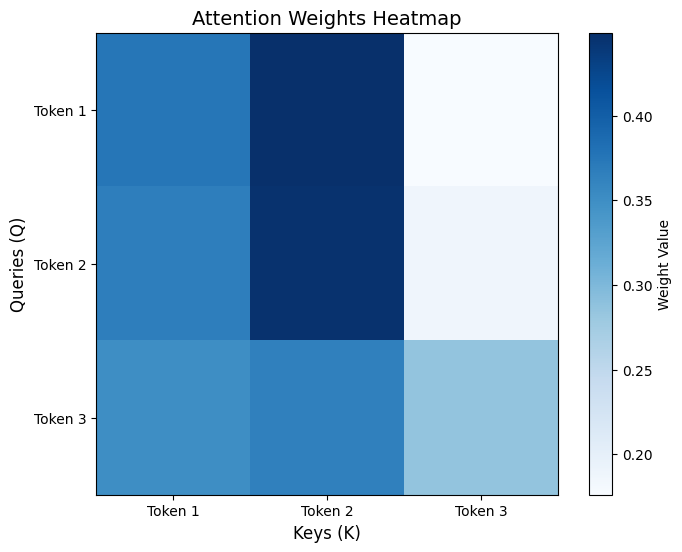

            Key 1     Key 2     Key 3
Query 1  0.374842  0.448981  0.176176
Query 2  0.366621  0.446005  0.187374
Query 3  0.350351  0.363761  0.285888
            Dim 1     Dim 2     Dim 3     Dim 4
Token 1  0.363212  0.929287  0.894377  1.187323
Token 2  0.362451  0.918331  0.887445  1.177732
Token 3  0.355125  0.815712  0.899543  1.083221


array([[0.37484247, 0.44898142, 0.1761761 ],
       [0.3666213 , 0.44600504, 0.18737366],
       [0.35035088, 0.36376128, 0.28588784]])

In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt  # For plotting the heatmap
import numpy as np               # For numerical operations

# === INPUT SEQUENCE ===
# Define a simple input sequence (3 tokens, 4-dimensional embeddings)
# This is like: "I love Sri-Lanka" → token embeddings → X
input_sequence = np.array([
    [1, 1, 0, 0],  # Token 1 (e.g., "I")
    [0, 0, 1, 1],  # Token 2 (e.g., "Love")
    [0, 1, 0, 0]   # Token 3 (e.g., "Sri Lanka")
])

# === INITIALIZE WEIGHT MATRICES ===
np.random.seed(42)  # Ensure reproducibility of random weights
d_k = input_sequence.shape[1]  # Embedding dimension (4 here)

# Initialize weight matrices for Q (query), K (key), V (value)
W_Q = np.random.rand(d_k, d_k)  # (4x4)
W_K = np.random.rand(d_k, d_k)
W_V = np.random.rand(d_k, d_k)

# === OPTIONAL: Use constant weights instead of random ===
"""
ones_matrix = np.ones((4, 4))  # Define a matrix of all 1s
W_Q = ones_matrix              # Replace W_Q with ones
W_V = ones_matrix              # Replace W_V with ones
W_K_q = ones_matrix            # Intended for W_K, but variable unused
"""

# === COMPUTE Q, K, V MATRICES ===
Q = np.dot(input_sequence, W_Q)  # Queries: shape (3 tokens, 4 dims)
K = np.dot(input_sequence, W_K)  # Keys
V = np.dot(input_sequence, W_V)  # Values

# === ATTENTION SCORE CALCULATION ===
# Dot-product of Q and K.T (transpose), scaled by sqrt(d_k)
scores = np.dot(Q, K.T) / np.sqrt(d_k)  # Shape: (3, 3) — attention for each token to others

# Apply softmax row-wise to get attention weights
attention_weights = np.exp(scores) / np.sum(np.exp(scores), axis=1, keepdims=True)

# Multiply attention weights with values to get output vectors
output = np.dot(attention_weights, V)  # Final self-attended output: shape (3, 4)

# === VISUALIZE ATTENTION WEIGHTS AS HEATMAP ===
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(attention_weights, cmap="Blues")  # Heatmap of attention weights

# Label axes with token numbers
ax.set_xticks(range(len(input_sequence)))
ax.set_yticks(range(len(input_sequence)))
ax.set_xticklabels([f"Token {i+1}" for i in range(len(input_sequence))])  # Columns = Keys
ax.set_yticklabels([f"Token {i+1}" for i in range(len(input_sequence))])  # Rows = Queries

# Add axis labels and title
ax.set_xlabel("Keys (K)", fontsize=12)
ax.set_ylabel("Queries (Q)", fontsize=12)
ax.set_title("Attention Weights Heatmap", fontsize=14)

# Add color bar to explain scale of attention weights
cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Weight Value")

# Display the heatmap
plt.show()

# === OPTIONAL: DISPLAY ATTENTION WEIGHTS + OUTPUT AS TABLES ===
import pandas as pd

# Convert attention weights to DataFrame for easy viewing
attention_df = pd.DataFrame(
    attention_weights,
    columns=[f"Key {i+1}" for i in range(len(input_sequence))],
    index=[f"Query {i+1}" for i in range(len(input_sequence))]
)

# Convert output vectors to DataFrame
output_df = pd.DataFrame(
    output,
    columns=[f"Dim {i+1}" for i in range(output.shape[1])],
    index=[f"Token {i+1}" for i in range(len(input_sequence))]
)

# Optionally print these:
print(attention_df)
print(output_df)

# Final result: the raw matrix of attention weights (also shown in the heatmap)
attention_weights  # numpy array of shape (3, 3)



In [ ]:
W_Q

array([[0.37454012, 0.95071431, 0.73199394, 0.59865848],
       [0.15601864, 0.15599452, 0.05808361, 0.86617615],
       [0.60111501, 0.70807258, 0.02058449, 0.96990985],
       [0.83244264, 0.21233911, 0.18182497, 0.18340451]])

Last layer attention shape: torch.Size([12, 6, 6])


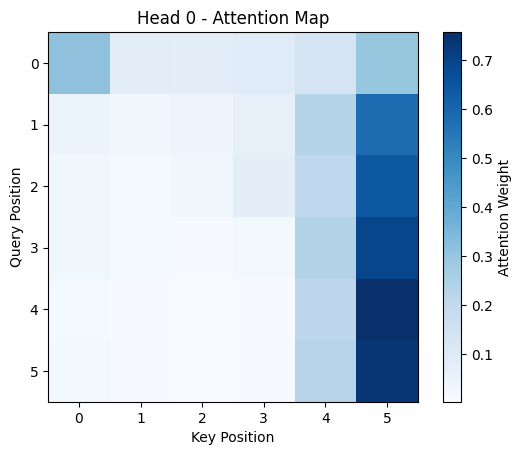

In [56]:
# Step 1: Install required libraries (if not already done)
# !pip install transformers torch

#_LazyModule is an internal utility from HuggingFace used to delay the actual import of submodules
#until they are needed. This can speed up initial loading and reduce memory use.
from transformers.utils.import_utils import _LazyModule
import os

#This disables SDPA (Scaled Dot Product Attention), a performance optimization using fused attention
# kernels (e.g., FlashAttention) in PyTorch 2+
os.environ["TRANSFORMERS_NO_SDPA"] = "1"  # Disable SDPA for HuggingFace


# Step 2: Load a standard Hugging Face transformer (e.g., BERT)
from transformers import AutoModel, AutoTokenizer
import torch

# Use a smaller model like BERT for CPU-based inference
model_name = "bert-base-uncased"

# Load model and tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name, output_attentions=True)  # enable attention output
model.eval()  # Set to evaluation mode (no dropout, etc.)

# Step 3: Prepare input text
text = "I love programming."

# Tokenize input (returns input_ids and attention_mask)
inputs = tokenizer(text, return_tensors="pt")  # stays on CPU

seq_len = inputs["input_ids"].shape[1]

# Step 4: Forward pass with attention outputs
with torch.no_grad():  # disable gradient computation
    outputs = model(**inputs)

# Step 5: Extract attention from the last layer
# Shape: (batch_size=1, num_heads, seq_len, seq_len)
attentions = outputs.attentions[-1][0]  # Take last Layer in batch
print("Last layer attention shape:", attentions.shape)  # e.g. (12, 6, 6) for BERT
#In BERT's last attention layer, 12 attention heads are there: Multi-head attention
#There are 6 tokens here:
#['[CLS]', 'i', 'love', 'programming', '.', '[SEP]']

# Optional: visualize attention from one head
import matplotlib.pyplot as plt

plt.imshow(attentions[0].numpy(), cmap="Blues")  # show head 0
plt.title("Head 0 - Attention Map")
plt.xlabel("Key Position")
plt.ylabel("Query Position")
plt.colorbar(label="Attention Weight")
plt.show()

Last layer attention shape: torch.Size([1, 12, 6, 6])


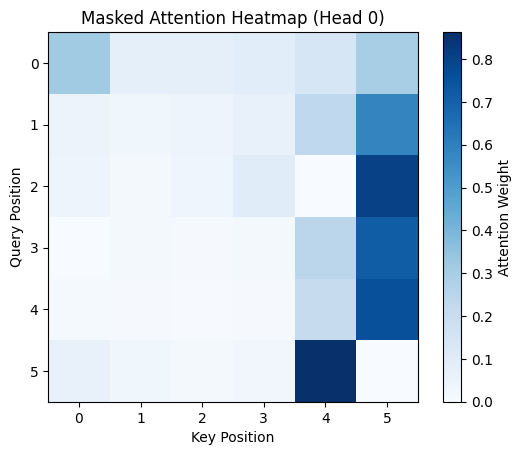

In [66]:
# Step 1: Install required libraries (if not already done)
# Install transformers and PyTorch via pip (run in a notebook environment if needed)
# !pip install transformers torch

# Import libraries
# _LazyModule: Internal HuggingFace utility for lazy loading of modules to reduce memory usage
from transformers.utils.import_utils import _LazyModule
# os: For setting environment variables
import os
# torch: PyTorch for tensor operations and neural network computations
import torch
# F: Functional module of PyTorch for operations like softmax
import torch.nn.functional as F
# matplotlib.pyplot: For visualizing attention weights as a heatmap
import matplotlib.pyplot as plt

# Disable SDPA (Scaled Dot-Product Attention) optimization to ensure compatibility
# Setting this environment variable forces the model to use standard attention
os.environ["TRANSFORMERS_NO_SDPA"] = "1"

# Step 2: Load BERT model and tokenizer
# AutoModel and AutoTokenizer: HuggingFace utilities for loading pretrained models and tokenizers
from transformers import AutoModel, AutoTokenizer
# Define model name (bert-base-uncased: lowercase, 12-layer BERT with 768 hidden size)
model_name = "bert-base-uncased"
# Load tokenizer for converting text to input IDs and attention masks
tokenizer = AutoTokenizer.from_pretrained(model_name)
# Load BERT model, enabling output_attentions to return attention weights
model = AutoModel.from_pretrained(model_name, output_attentions=True)
# Set model to evaluation mode (disables dropout for inference)
model.eval()

# Step 3: Prepare input text
# Sample input text to process
text = "I love programming."
# Tokenize text into input_ids and attention_mask, return as PyTorch tensors (return_tensors="pt")
inputs = tokenizer(text, return_tensors="pt")
# Get sequence length (e.g., 6 for [CLS, I, love, programming, ., SEP])
seq_len = inputs["input_ids"].shape[1]

# Step 4: Custom forward function for attention with 2D mask
# Define custom forward to apply a 2D attention mask to the last self-attention layer
# Arguments match BertSelfAttention.forward signature to handle all model inputs
# self: The attention layer object; hidden_states: Input tensor [batch, seq_len, embed_dim]
# attention_mask: Optional padding mask [batch, 1, 1, seq_len]; custom_2d_mask: Custom mask
def custom_forward_with_2d_mask(self, hidden_states, attention_mask=None, head_mask=None, encoder_hidden_states=None, encoder_attention_mask=None, past_key_value=None, output_attentions=False, custom_2d_mask=None):
    # Extract dimensions: batch size, sequence length, embedding dimension
    bsz, tgt_len, embed_dim = hidden_states.size()
    # Number of attention heads (e.g., 12 for BERT)
    num_heads = self.num_attention_heads
    # Dimension per head (embed_dim / num_heads, e.g., 768/12 = 64)
    head_dim = self.attention_head_size

    # Helper function to reshape and transpose tensors for multi-head attention
    # Input: [batch, seq_len, embed_dim]; Output: [batch, num_heads, seq_len, head_dim]
    def transpose(x):
        return x.view(bsz, -1, num_heads, head_dim).transpose(1, 2)

    # Project hidden_states to query, key, value using learned linear layers
    query = transpose(self.query(hidden_states))  # [batch, num_heads, seq_len, head_dim]
    key = transpose(self.key(hidden_states))     # [batch, num_heads, seq_len, head_dim]
    value = transpose(self.value(hidden_states)) # [batch, num_heads, seq_len, head_dim]

    # Compute attention scores: Q * K^T / sqrt(d_k)
    # Shape: [batch, num_heads, seq_len, seq_len]
    attn_weights = torch.matmul(query, key.transpose(-2, -1)) / (head_dim ** 0.5)

    # Apply padding mask (adds -inf to padded positions to ignore them)
    if attention_mask is not None:
        attn_weights = attn_weights + attention_mask

    # Apply custom 2D mask to block specific token-to-token attention
    if custom_2d_mask is not None:
        # Ensure mask is on same device (CPU/GPU) and dtype as attn_weights
        custom_2d_mask = custom_2d_mask.to(attn_weights.device, dtype=attn_weights.dtype)
        # Add mask to attention scores (-inf blocks attention)
        attn_weights = attn_weights + custom_2d_mask

    # Apply softmax to get attention probabilities (normalize over last dimension)
    attn_probs = F.softmax(attn_weights, dim=-1)  # [batch, num_heads, seq_len, seq_len]

    # Compute context vector: weighted sum of values using attention probabilities
    context = torch.matmul(attn_probs, value)  # [batch, num_heads, seq_len, head_dim]

    # Reshape context back to [batch, seq_len, embed_dim] for output
    context = context.transpose(1, 2).contiguous().view(bsz, tgt_len, num_heads * head_dim)

    # Access parent BertAttention module to get output layer
    parent_attention = model.encoder.layer[-1].attention
    # Apply output projection and residual connection
    # context: attention output; hidden_states: original input for residual
    output = parent_attention.output(context, hidden_states)

    # Return output and attention probabilities (if requested)
    # output: [batch, seq_len, embed_dim]; attn_probs: [batch, num_heads, seq_len, seq_len]
    return output, attn_probs if output_attentions else None

# Step 5: Create custom 2D mask
# Get number of attention heads from model config (e.g., 12)
num_heads = model.config.num_attention_heads
# Set batch size (1 for single input)
batch_size = 1
# Initialize mask with zeros (no masking by default)
# Shape: [batch, num_heads, seq_len, seq_len], e.g., [1, 12, 6, 6]
custom_2d_mask = torch.zeros(batch_size, num_heads, seq_len, seq_len)
# Set specific token pairs to -inf to block attention (applied to all heads)
custom_2d_mask[:, :, 2, 4] = float('-inf')  # Block token 2 (love) -> token 4 (.)
custom_2d_mask[:, :, 5, 5] = float('-inf')  # Block token 5 (SEP) -> itself
custom_2d_mask[:, :, 3, 0] = float('-inf')  # Block token 3 (programming) -> token 0 (CLS)

# Step 6: Patch last attention layer's forward method
# Import types for dynamic method binding
import types
# Access the self-attention module of the last layer
attn_layer = model.encoder.layer[-1].attention.self
# Patch forward method with lambda to inject custom mask
# Lambda matches BertSelfAttention.forward signature to handle all arguments
attn_layer.forward = types.MethodType(
    lambda self, hidden_states, attention_mask=None, head_mask=None, encoder_hidden_states=None, encoder_attention_mask=None, past_key_value=None, output_attentions=False, **kwargs:
    custom_forward_with_2d_mask(self, hidden_states, attention_mask, head_mask, encoder_hidden_states, encoder_attention_mask, past_key_value, output_attentions, custom_2d_mask),
    attn_layer
)

# Step 7: Forward pass
# Disable gradient computation for inference (reduces memory usage)
with torch.no_grad():
    # Run model with inputs, enabling attention output
    # inputs: Dictionary with input_ids, attention_mask
    outputs = model(**inputs, output_attentions=True)

# Step 8: Extract attention outputs
# Extract attention weights from last layer
# Shape: [batch, num_heads, seq_len, seq_len], e.g., [1, 12, 6, 6]
attentions = outputs.attentions[-1]
# Print shape to verify output (helps debug)
print("Last layer attention shape:", attentions.shape)

# Step 9: Visualize attention for head 0
# Plot attention weights for first batch, first head as a heatmap
# Convert to numpy and move to CPU for visualization
plt.imshow(attentions[0, 0].cpu().numpy(), cmap="Blues")
# Set plot title
plt.title("Masked Attention Heatmap (Head 0)")
# Label axes
plt.xlabel("Key Position")
plt.ylabel("Query Position")
# Add colorbar to show attention weight scale
plt.colorbar(label="Attention Weight")
# Display the plot
plt.show()